# Example notebook

This notebook demonstrates some of the more interesting features of [stacrs](https://pypi.org/project/stacrs/).

## stac-geoparquet

The [stac-geoparquet](https://github.com/stac-utils/stac-geoparquet/blob/main/spec/stac-geoparquet-spec.md) specification describes how to store STAC items in a [geoparquet](https://geoparquet.org/).
Use **stacrs** to read and write **stac-geoparquet**.

In [ ]:
import os.path

import stacrs
import humanize

items = await stacrs.search(
    "https://landsatlook.usgs.gov/stac-server",
    collections="landsat-c2l2-sr",
    intersects={"type": "Point", "coordinates": [-105.119, 40.173]},
    sortby="-properties.datetime",
    max_items=1000,
)
await stacrs.write("items.json", items)  # GeoJSON feature collection
await stacrs.write("items-uncompressed.parquet", items, format="parquet[none]")  # uncompressed stac-geoparquet
await stacrs.write("items.parquet", items)   # compressed stac-geoparquet

for file_name in (
    "items.json",
    "items-uncompressed.parquet",
    "items.parquet",
):
    print(f"{file_name}: {humanize.naturalsize(os.path.getsize(file_name))}")

items = stacrs.read("items.parquet")
assert len(items["features"]) == 1000

items.json: 21.4 MB
items.ndjson: 21.4 MB
items.parquet: 488.2 kB
items-compressed.parquet: 178.8 kB


### Search

As seen above, you can `search` STAC APIs.
Using [DuckDB](https://duckdb.org/), you can search **stac-geoparquet** files as well, both local and remote.

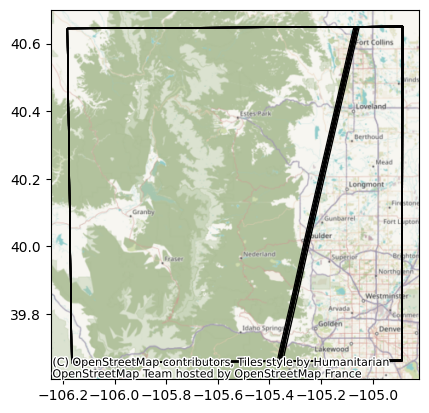

In [3]:
import contextily
import stacrs
from geopandas import GeoDataFrame

url = "https://github.com/gadomski/2024-09-FOSS4G-NA-stac-rs/raw/refs/heads/main/benches/1000-sentinel-2-items-stac-rs.parquet"
items = stacrs.search(
    url, intersects={"type": "Point", "coordinates": [-105.1019, 40.1672]}
)
data_frame = GeoDataFrame.from_features(items, crs="EPSG:4326")
axis = data_frame.plot(facecolor="none")
contextily.add_basemap(axis, crs=data_frame.crs.to_string())

### To arrow

If you installed **stacrs** with the `arrow` extra (`python -m pip install 'stacrs[arrow]'`) you can search **stac-geoparquet** files into an arrow table, which can be loaded directly into (e.g.) GeoPandas.
This will be significantly more efficient than loading Python dictionaries into a data frame.

In [8]:
from stacrs import DuckdbClient

client = DuckdbClient()
items = client.search_to_arrow("items.parquet", intersects={"type": "Point", "coordinates": [-105.1019, 40.1672]})  # you can search a parquet file with DuckDB
data_frame = GeoDataFrame.from_arrow(items)
data_frame

error code: 0
error code: 0
error code: 0
error code: 0
error code: 0
error code: 0
error code: 0


type stac_version                                    stac_extensions  \
0    Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
1    Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
2    Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
3    Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
4    Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
..       ...          ...                                                ...   
995  Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
996  Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
997  Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
998  Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   
999  Feature        1.1.0  [https://landsat.usgs.gov/stac/landsat-extensi...   

                                              id card4l:specification_version  \
0    LC08_L2SP_033032_20241010_20241015_02_T1_SR                          5.0   
1    LC09_L2SP_034032_20241009_20241010_02_T1_SR                          5.0   
2    LC09_L2SP_034032_20241009_20241011_02_T1_SR                          5.0   
3    LC09_L2SP_033032_20241002_20241003_02_T1_SR                          5.0   
4    LC08_L2SP_034032_20241001_20241006_02_T1_SR                          5.0   
..                                           ...                          ...   
995  LC08_L2SP_033032_20240924_20240928_02_T1_SR                          5.0   
996  LC09_L2SP_034032_20240923_20240924_02_T1_SR                          5.0   
997  LC09_L2SP_033032_20240916_20240917_02_T1_SR                          5.0   
998  LC08_L2SP_034032_20240915_20240921_02_T1_SR                          5.0   
999  LC08_L2SP_033032_20240908_20240914_02_T1_SR                          5.0   

    card4l:specification                                              links  \
0                     SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
1                     SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
2                     SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
3                     SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
4                     SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
..                   ...                                                ...   
995                   SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
996                   SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
997                   SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
998                   SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   
999                   SR  [{'href': 'https://landsatlook.usgs.gov/stac-s...   

                                                assets       collection  \
0    {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
1    {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
2    {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
3    {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
4    {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
..                                                 ...              ...   
995  {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
996  {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
997  {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
998  {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   
999  {'MTL.xml': {'href': 'https://landsatlook.usgs...  landsat-c2l2-sr   

                            datetime  ... accuracy:geometric_y_bias  \
0   2024-10-10 13:37:15.969000-04:00  ...                         0   
1   2024-10-09 13:43:22.695000-04:00  ...                         0   
2   2024-10

## Search to

If you want to save the results of a STAC API search directly to a file, use `search_to`.
This will generally be more performant than using `search` then `write`.

In [ ]:
stacrs.search_to(
    "items.parquet",
    "https://landsatlook.usgs.gov/stac-server",
    collections="landsat-c2l2-sr",
    intersects={"type": "Point", "coordinates": [-105.119, 40.173]},
    sortby="-properties.datetime",
    max_items=1000,
)

1000

## Search performance

Here's a performance comparison when searching with **stacrs** versus [pystac-client](https://pystac-client.readthedocs.io/).

In [3]:
import time
from pystac_client import Client
import stacrs

client = Client.open("https://stac.eoapi.dev")
start = time.time()
item_search = client.search(collections=["WildFires-LosAngeles-Jan-2025"])
items = list(item_search.items_as_dicts())
end = time.time()
print(f"pystac-client: {end - start}s ({len(items)} items)")

start = time.time()
items = await stacrs.search(
    "https://stac.eoapi.dev", collections=["WildFires-LosAngeles-Jan-2025"]
)
end = time.time()
print(f"stacrs: {end - start}s ({len(items)} items)")

pystac-client: 7.5231709480285645s (467 items)
stacrs: 7.2893760204315186s (467 items)
